In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_path='/content/drive/MyDrive/FDM_Project/DataSet/dataset_phishing.csv'

In [4]:
dataset = pd.read_csv(dataset_path)
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
dataset.shape

(11430, 89)

In [6]:
dataset.columns


Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [7]:

# Define a mapping of values to be replaced
value_mapping = {'legitimate': 0, 'phishing': 1}

# Use the `replace` method to map values in the 'status' column
dataset['status'] = dataset['status'].replace(value_mapping)

# Save the modified DataFrame back to a CSV file if needed
# df.to_csv('modified_dataset.csv', index=False)  # Uncomment this line if you want to save the modified data

# Print the DataFrame to verify the changes
print(dataset)


                                                     url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19   0        3           0      0 

In [8]:
dataset.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [9]:
# Find columns with missing values
columns_with_missing_values = dataset.columns[dataset.isnull().any()]

# Print the columns with missing values
print(columns_with_missing_values)

Index([], dtype='object')


In [10]:
# Calculate the variance of each column
column_variances = dataset.var()

# Drop the index column
column_variances = column_variances.dropna()

# Find columns with low variance
columns_with_low_variance = column_variances[column_variances < 0.1].index

# Print the columns with low variance
print(columns_with_low_variance)

Index(['nb_at', 'nb_or', 'nb_tilde', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_dollar', 'nb_dslash', 'http_in_path', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'random_domain',
       'path_extension', 'nb_external_redirection', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'ratio_nullHyperlinks', 'ratio_intRedirection', 'ratio_extRedirection',
       'ratio_intErrors', 'ratio_extErrors', 'login_form', 'submit_email',
       'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic',
       'whois_registered_domain', 'dns_record'],
      dtype='object')


<ipython-input-10-4db5f1d9476b>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_variances = dataset.var()


In [11]:
columns_to_remove=['length_hostname', 'nb_dots', 'nb_hyphens',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain',
       'random_domain','path_extension','length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh',
       'popup_window', 'safe_anchor','empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'domain_registration_length', 'google_index', 'page_rank']

processedDataset=dataset.drop(columns=columns_to_remove)

In [12]:
#processedDataset = dataset.copy()


In [13]:
#checking the data for null or missing values
processedDataset.isnull().sum()

url                        0
length_url                 0
ip                         0
nb_at                      0
https_token                0
nb_subdomains              0
prefix_suffix              0
shortening_service         0
nb_redirection             0
nb_external_redirection    0
iframe                     0
onmouseover                0
right_clic                 0
domain_age                 0
web_traffic                0
dns_record                 0
status                     0
dtype: int64

In [14]:
processedDataset.shape

(11430, 17)

In [15]:
processedDataset.head()


,url,length_url,ip,nb_at,https_token,nb_subdomains,prefix_suffix,shortening_service,nb_redirection,nb_external_redirection,iframe,onmouseover,right_clic,domain_age,web_traffic,dns_record,status
0,http://www.crestonwood.com/router.php,37,0,0,1,3,0,0,0,0,0,0,0,-1,0,1,0
1,http://shadetreetechnology.com/V4/validation/a...,77,1,0,1,1,0,0,1,0,0,0,0,5767,0,0,1
2,https://support-appleld.com.secureupdate.duila...,126,1,0,0,3,1,0,1,0,0,0,0,4004,5828815,0,1
3,http://rgipt.ac.in,18,0,0,1,2,0,0,1,0,0,0,0,-1,107721,0,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,0,0,1,2,0,0,1,0,0,0,0,8175,8725,0,0


In [16]:
processedDataset.columns

Index(['url', 'length_url', 'ip', 'nb_at', 'https_token', 'nb_subdomains',
       'prefix_suffix', 'shortening_service', 'nb_redirection',
       'nb_external_redirection', 'iframe', 'onmouseover', 'right_clic',
       'domain_age', 'web_traffic', 'dns_record', 'status'],
      dtype='object')

In [17]:
processedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   url                      11430 non-null  object
 1   length_url               11430 non-null  int64 
 2   ip                       11430 non-null  int64 
 3   nb_at                    11430 non-null  int64 
 4   https_token              11430 non-null  int64 
 5   nb_subdomains            11430 non-null  int64 
 6   prefix_suffix            11430 non-null  int64 
 7   shortening_service       11430 non-null  int64 
 8   nb_redirection           11430 non-null  int64 
 9   nb_external_redirection  11430 non-null  int64 
 10  iframe                   11430 non-null  int64 
 11  onmouseover              11430 non-null  int64 
 12  right_clic               11430 non-null  int64 
 13  domain_age               11430 non-null  int64 
 14  web_traffic              11430 non-nul

# **Visualizing the Data**

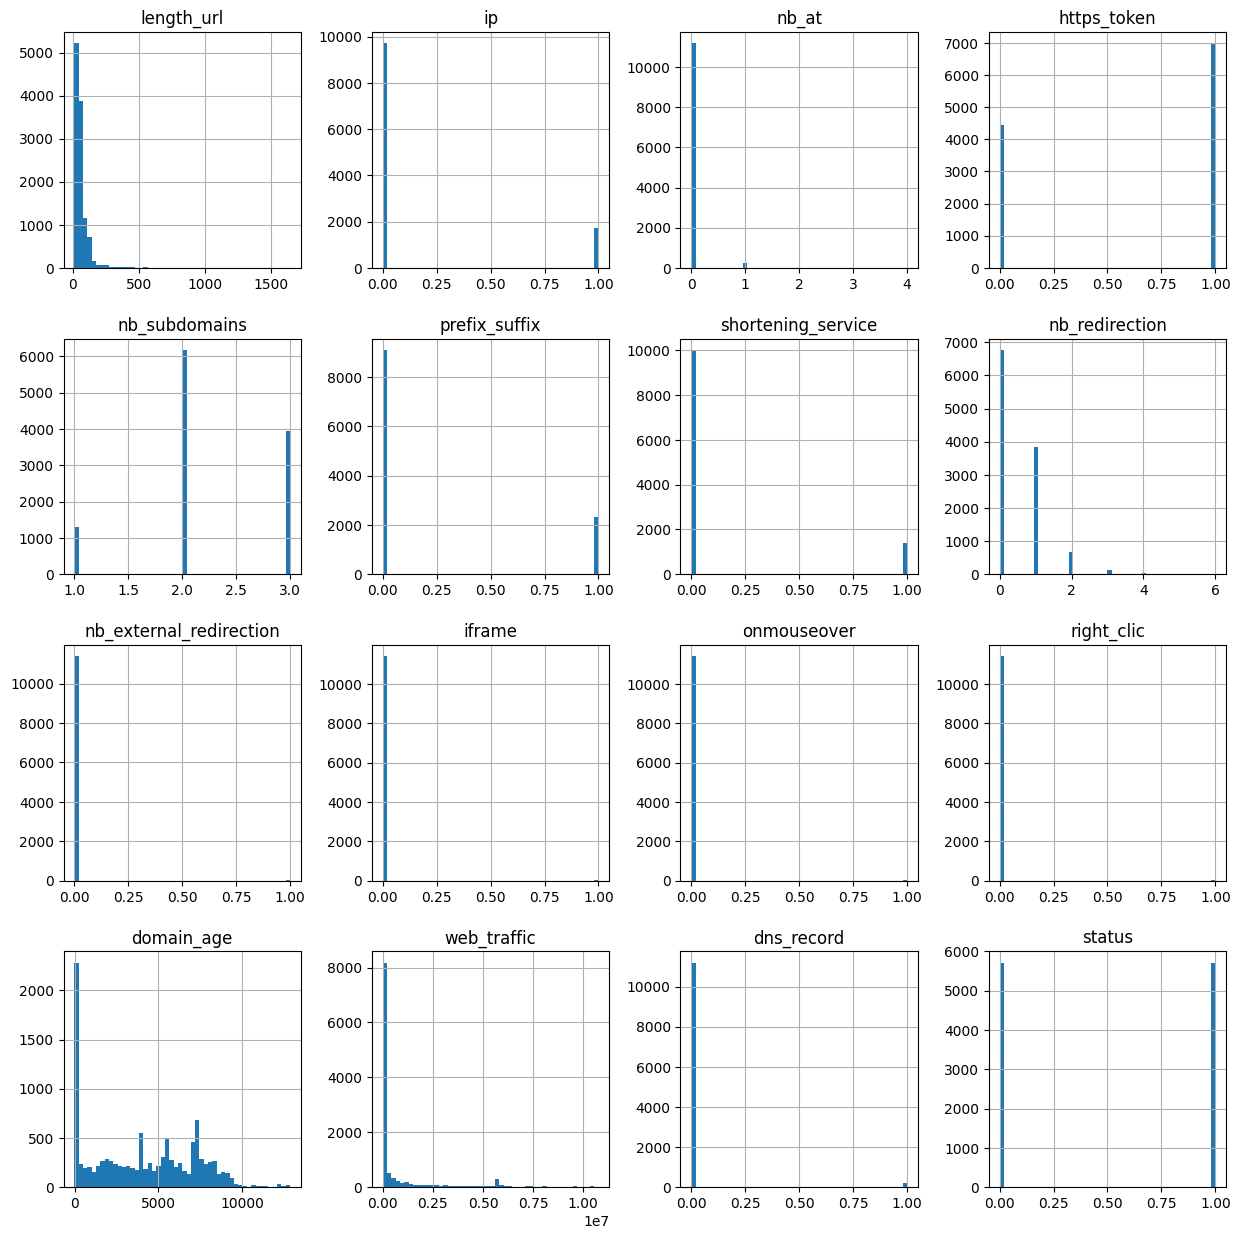

In [18]:
#Plotting the data distribution
processedDataset.hist(bins = 50,figsize = (15,15))
plt.show()

<ipython-input-19-3e5db212eef0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(processedDataset.corr())


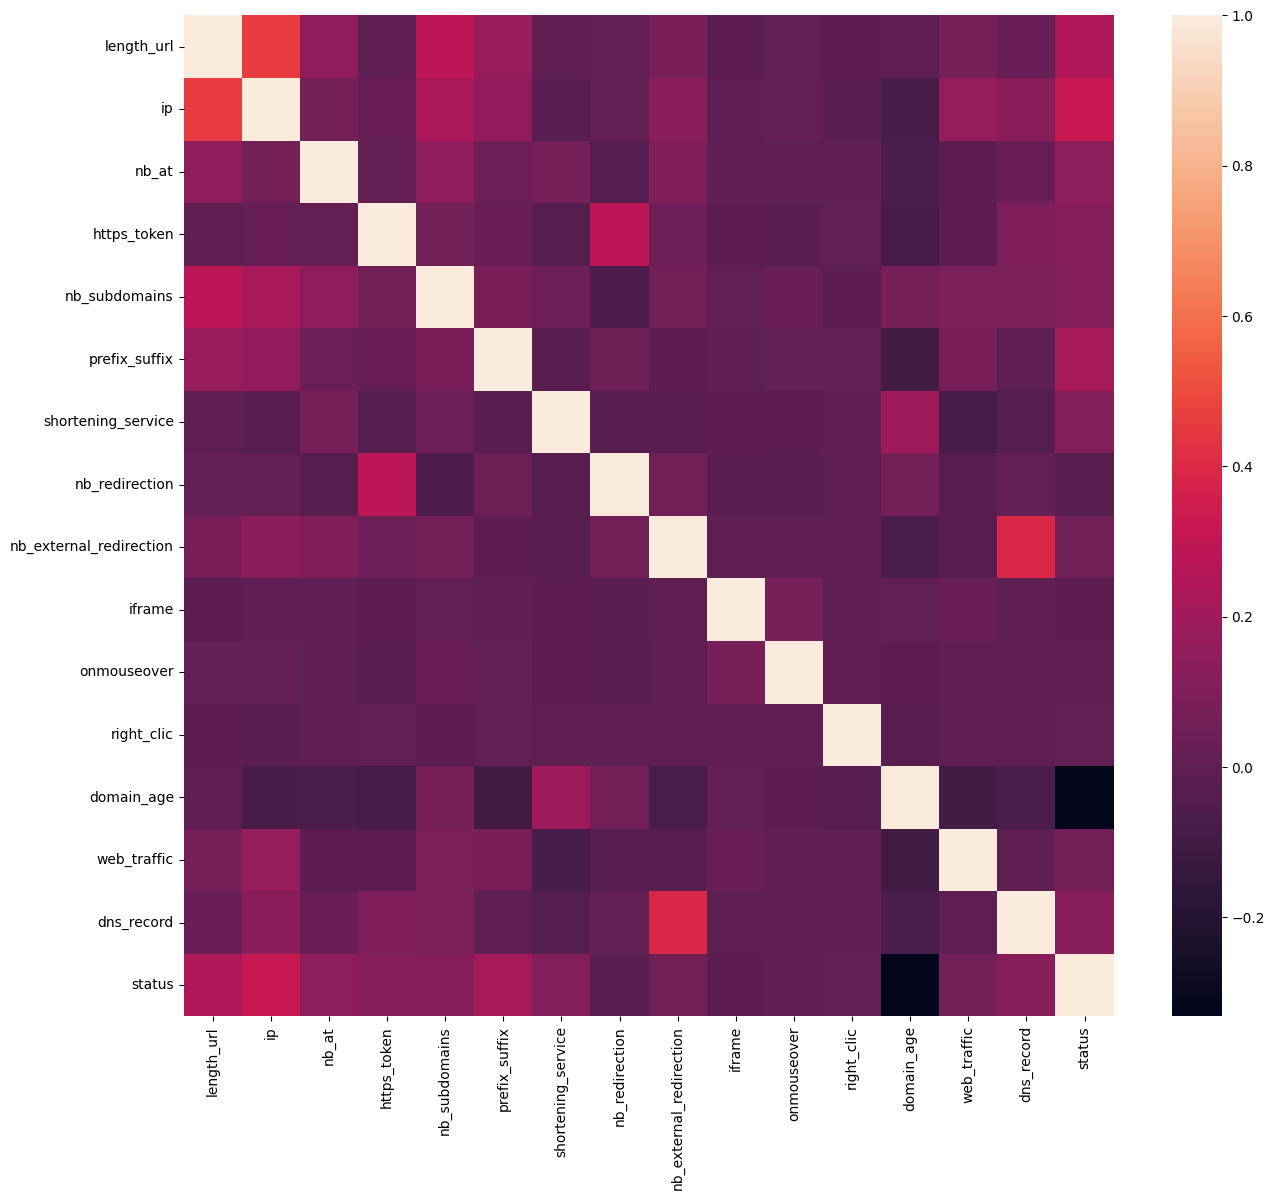

In [19]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(processedDataset.corr())
plt.show()

In [20]:
#Dropping the Domain column
processedDataset = processedDataset.drop(['url'], axis = 1).copy()

# **Shuffling and Splitting the Data**

In [21]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
processedDataset = processedDataset.sample(frac=1).reset_index(drop=True)
processedDataset.head()

,length_url,ip,nb_at,https_token,nb_subdomains,prefix_suffix,shortening_service,nb_redirection,nb_external_redirection,iframe,onmouseover,right_clic,domain_age,web_traffic,dns_record,status
0,71,0,0,1,2,1,0,1,0,0,0,0,-1,10431514,0,1
1,51,0,0,1,1,0,0,1,0,0,0,0,-1,0,0,1
2,23,0,0,1,2,0,0,0,0,0,0,0,5852,76924,0,1
3,60,0,0,1,3,0,1,0,0,0,0,0,5615,0,0,1
4,75,0,0,0,2,0,0,0,0,0,0,0,3312,228043,0,0


In [22]:
# Sepratating & assigning features and target columns to X & y
y = processedDataset['status']
X = processedDataset.drop('status',axis=1)
X.shape, y.shape


# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape


((9144, 15), (2286, 15))

# **Machine Learning Models & Training**

In [23]:
#importing packages
from sklearn.metrics import accuracy_score


In [24]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# **Desicion Tree Classifier**

In [25]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [26]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [27]:

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))


Decision Tree: Accuracy on training Data: 0.856
Decision Tree: Accuracy on test Data: 0.858


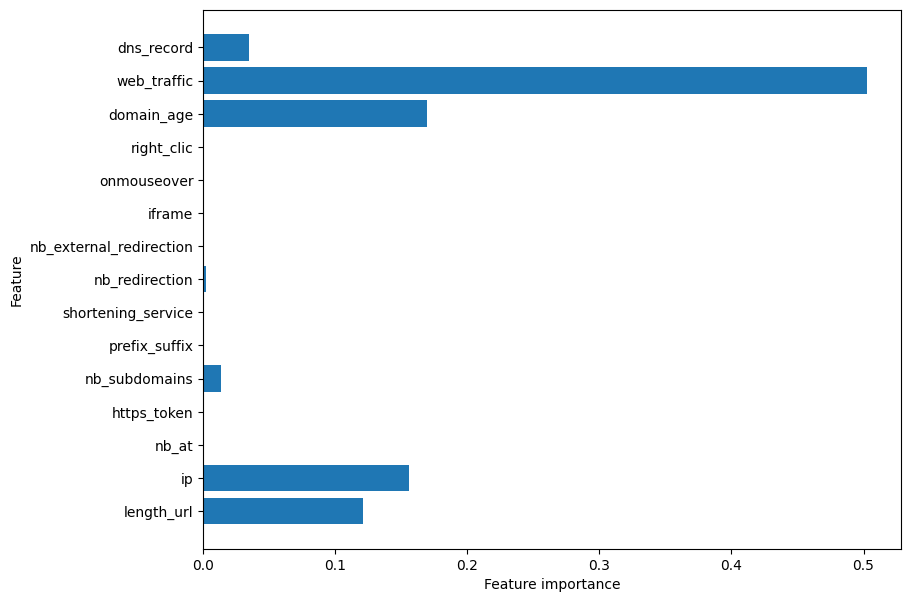

In [28]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)


# **Random Forest Classifier**

In [30]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [31]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [32]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.834
Random forest: Accuracy on test Data: 0.836


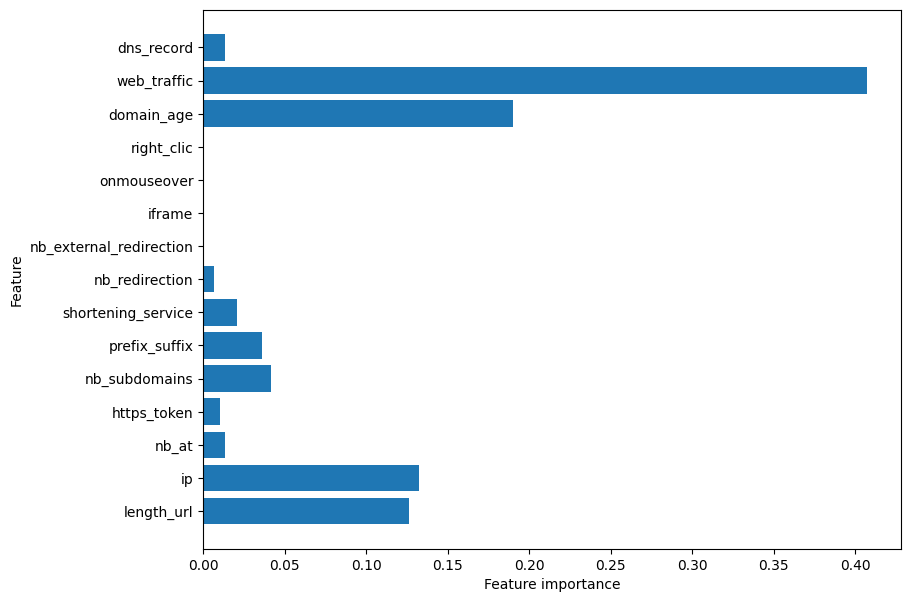

In [33]:

#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [34]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# **Multi Layer Perceptron**

In [35]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [36]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [37]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))


Multilayer Perceptrons: Accuracy on training Data: 0.740
Multilayer Perceptrons: Accuracy on test Data: 0.729


In [38]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

# **XGBoost Classifier**

In [39]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [41]:

#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.970
XGBoost : Accuracy on test Data: 0.908


In [42]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

# **Autoencoder Neural Network**

In [43]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [44]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 13)                208       
                                                                 
 dense_5 (Dense)             (None, 15)                210       
                                                                 
 dense_6 (Dense)             (None, 15)                240       
                                                                 
Total params: 1138 (4.45 KB)
Trainable params: 1138 (4.45 KB)

In [45]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/10
115/115 [==============================] - 2s 5ms/step - loss: -872554.4375 - accuracy: 0.6021 - val_loss: -858670.9375 - val_accuracy: 0.8682
Epoch 2/10
115/115 [==============================] - 0s 3ms/step - loss: -873481.2500 - accuracy: 0.9031 - val_loss: -856456.3750 - val_accuracy: 0.9568
Epoch 3/10
115/115 [==============================] - 0s 3ms/step - loss: -873335.0000 - accuracy: 0.9419 - val_loss: -856783.8750 - val_accuracy: 0.9502
Epoch 4/10
115/115 [==============================] - 0s 3ms/step - loss: -875654.6250 - accuracy: 0.6674 - val_loss: -859228.6875 - val_accuracy: 0.5927
Epoch 5/10
115/115 [==============================] - 0s 3ms/step - loss: -875934.4375 - accuracy: 0.5962 - val_loss: -859244.0000 - val_accuracy: 0.6124
Epoch 6/10
115/115 [==============================] - 0s 3ms/step - loss: -875947.8750 - accuracy: 0.8175 - val_loss: -859255.3750 - val_accuracy: 0.8693
Epoch 7/10
115/115 [==============================] - 0s 3ms/step - loss: -8

In [46]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

72/72 [==============================] - 0s 2ms/step - loss: -885270.5625 - accuracy: 0.4703

Autoencoder: Accuracy on training Data: 0.482
Autoencoder: Accuracy on test Data: 0.470


In [47]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

# **Support Vector Machines**

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)


In [47]:

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [47]:



#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))


# **Comparision of Models**

In [48]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.856,0.858
1,Random Forest,0.834,0.836
2,Multilayer Perceptrons,0.740,0.729
3,XGBoost,0.970,0.908
4,AutoEncoder,0.482,0.470


In [49]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.970,0.908
0,Decision Tree,0.856,0.858
1,Random Forest,0.834,0.836
2,Multilayer Perceptrons,0.740,0.729
4,AutoEncoder,0.482,0.470


In [50]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [51]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)